In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgbm
import random
import time
import matplotlib.pyplot as plt

In [2]:
data=np.load('data/new_data_train.npy')
X_test=np.load('data/new_data_test.npy')

data_all=np.copy(data)

data=list(data)
random.shuffle(data)
data=np.array(data)

num_data=data.shape[0]
num_test=X_test.shape[0]

print(num_data)
print(num_test)

ratio_train=0.8

data_train=data[:int(num_data*ratio_train),:]
data_val=data[int(num_data*ratio_train):,:]

X_train=data_train[:,:-1]
y_train=data_train[:,-1]
X_val=data_val[:,:-1]
y_val=data_val[:,-1]

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

260864
261477
(208691, 21)
(208691,)
(52173, 21)
(52173,)


weight = 15.3346117721
[50]	cv_agg's auc: 0.616705 + 0.00191067
[100]	cv_agg's auc: 0.61863 + 0.00210995
[150]	cv_agg's auc: 0.620331 + 0.00225576
[200]	cv_agg's auc: 0.621373 + 0.00236504
[250]	cv_agg's auc: 0.622089 + 0.00236126
[300]	cv_agg's auc: 0.62304 + 0.0022844
[350]	cv_agg's auc: 0.623914 + 0.00220073
[400]	cv_agg's auc: 0.624817 + 0.00219661
[450]	cv_agg's auc: 0.62557 + 0.00222548
[500]	cv_agg's auc: 0.62612 + 0.00215343
[550]	cv_agg's auc: 0.626549 + 0.00216127
[600]	cv_agg's auc: 0.626983 + 0.00219089
[650]	cv_agg's auc: 0.627333 + 0.00217789
[700]	cv_agg's auc: 0.627653 + 0.00216783
[750]	cv_agg's auc: 0.62795 + 0.00214307
[800]	cv_agg's auc: 0.628221 + 0.00217364
[850]	cv_agg's auc: 0.628449 + 0.00216129
[900]	cv_agg's auc: 0.628687 + 0.00217147
[950]	cv_agg's auc: 0.62887 + 0.00218932
[1000]	cv_agg's auc: 0.629048 + 0.00218201
[1050]	cv_agg's auc: 0.629189 + 0.00218551
[1100]	cv_agg's auc: 0.62934 + 0.00218419
[1150]	cv_agg's auc: 0.629447 + 0.00219278
[1200]	cv_agg's 

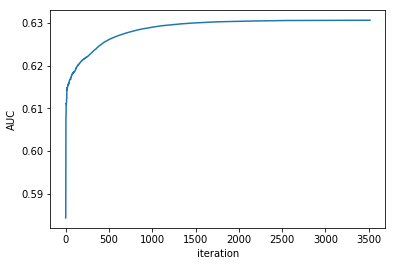

Training until validation scores don't improve for 500 rounds.
[50]	valid_0's auc: 0.610649
[100]	valid_0's auc: 0.611581
[150]	valid_0's auc: 0.612478
[200]	valid_0's auc: 0.613741
[250]	valid_0's auc: 0.614145
[300]	valid_0's auc: 0.614813
[350]	valid_0's auc: 0.615375
[400]	valid_0's auc: 0.616092
[450]	valid_0's auc: 0.616841
[500]	valid_0's auc: 0.617447
[550]	valid_0's auc: 0.617829
[600]	valid_0's auc: 0.618175
[650]	valid_0's auc: 0.618659
[700]	valid_0's auc: 0.619064
[750]	valid_0's auc: 0.619416
[800]	valid_0's auc: 0.619723
[850]	valid_0's auc: 0.619971
[900]	valid_0's auc: 0.620227
[950]	valid_0's auc: 0.620418
[1000]	valid_0's auc: 0.620614
[1050]	valid_0's auc: 0.620818
[1100]	valid_0's auc: 0.620978
[1150]	valid_0's auc: 0.621119
[1200]	valid_0's auc: 0.621254
[1250]	valid_0's auc: 0.621351
[1300]	valid_0's auc: 0.621484
[1350]	valid_0's auc: 0.621613
[1400]	valid_0's auc: 0.621673
[1450]	valid_0's auc: 0.621746
[1500]	valid_0's auc: 0.621807
[1550]	valid_0's auc: 0.621

In [3]:
num1=np.sum(y_train)
num0=y_train.shape[0]-num1
weight=num0/num1
print('weight =',weight)

lgbm_params = {
    'boosting_type': 'gbdt', 'objective': 'binary', 'nthread': -1,
    'num_leaves': 2**2-1, 'learning_rate': 0.01, 'max_depth': 8, 'subsample_for_bin': 200000,
    'subsample': 1.0, 'subsample_freq': 1, 'colsample_bytree': 0.6, 'reg_alpha': 0, 'reg_lambda': 3,
    'min_split_gain': 0.8, 'min_child_weight': 1.0, 'min_child_samples': 5000, 
    'scale_pos_weight': weight,'metric':'auc'}


# t4 = lgbm.sklearn.LGBMClassifier(n_estimators=1000, seed=0, **t4_params)

train_data = lgbm.Dataset(X_train, label=y_train)
validation_data = lgbm.Dataset(X_val, label=y_val)
dataset=lgbm.Dataset(data_all[:,:-1], label=data_all[:,-1])

num_round = 5000
# bst = lgbm.train(lgbm_params, train_data, num_round, valid_sets=[validation_data], verbose_eval=50,early_stopping_rounds=500)
cv_results = lgbm.cv(lgbm_params, dataset, num_round, nfold=5, verbose_eval=50, early_stopping_rounds=500)
print('best cv score:', cv_results['auc-mean'][-1])

plt.errorbar(x=range(0, len(cv_results['auc-mean'])),
             y=cv_results['auc-mean'])
plt.xlabel('iteration')
plt.ylabel('AUC')
plt.savefig('img/AUC_his.png')
plt.show()

bst = lgbm.train(lgbm_params, train_data, num_round, valid_sets=[validation_data], verbose_eval=50,early_stopping_rounds=500)


In [4]:
ypred = bst.predict(X_val)
print(ypred)

[ 0.55388707  0.45412629  0.67246061 ...,  0.42406181  0.50766556
  0.63546965]


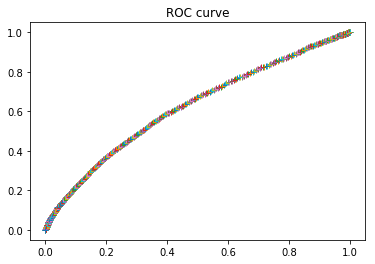

AUC = 0.623030324583


In [ ]:
perform_his=[]
bounds=np.linspace(0.0,1.0,1001)

for bound in bounds:
    pre=ypred>bound
    true_pos=np.sum(np.logical_and(pre==1,y_val==1))
    true_neg=np.sum(np.logical_and(pre==0,y_val==0))
    false_pos=np.sum(np.logical_and(pre==1,y_val==0))
    false_neg=np.sum(np.logical_and(pre==0,y_val==1))
    TPR=true_pos/(true_pos+false_neg)
    FPR=false_pos/(false_pos+true_neg)
    perform_his.append((FPR,TPR))
    plt.plot(FPR,TPR,'+')
    perform_his_s= sorted(perform_his, key=lambda d:d[0])

plt.title('ROC curve')
plt.savefig('img/ROC.png')
plt.show()

AUC=0
for i in range(1,len(perform_his_s)):
    pre_p=perform_his_s[i-1]
    cur_p=perform_his_s[i]
    AUC+=(cur_p[1]+pre_p[1])*(cur_p[0]-pre_p[0])/2
    
print('AUC =',AUC)

In [ ]:
ypred = bst.predict(X_test)
print(ypred)

In [ ]:
f_out=open('prediction.csv','w')
f_out.write('user_id,merchant_id,prob\n')
f_test=open('data_format1/test_format1.csv')
i=0
for line in f_test:
    l=line.strip()
    if l=='user_id,merchant_id,prob':
        continue
    [user,seller,_]=l.split(',')
    f_out.write(user+','+seller+','+str(ypred[i])+'\n')
    i+=1
f_out.close()

In [ ]:
print(lgbm_params)